<a href="https://colab.research.google.com/github/jannat0718/Retail-Customer-Segmentation/blob/main/Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__WEEK1__

In [ ]:
#import Libraries
import pandas as pd 
import numpy as np
from operator import attrgetter
import datetime as dt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

__Load Dataset__

In [ ]:
data = pd.read_excel("Online Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


__Data Cleaning__

__#Check For missing Data and formulate an apt strategy to treat them.__

In [ ]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
data.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

__#Remove duplicate data records.__

In [ ]:
data.duplicated().sum()

5225

In [ ]:
data=data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

__#Perform descriptive analytics on the given data.__

__Total Customers__

In [ ]:
len(data['CustomerID'].unique())

4372

__Country List__

In [ ]:
pd.DataFrame(data['Country'].unique())

,0
0,United Kingdom
1,France
2,Australia
3,Netherlands
4,Germany
5,Norway
6,EIRE
7,Switzerland
8,Spain
9,Poland


__Countrywise Customer__

In [ ]:
c=pd.DataFrame(data.groupby('Country')['CustomerID'].nunique())
customercoutrywise=pd.DataFrame(c).sort_values(by='CustomerID', ascending=False)
customercoutrywise

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


__Percentage of Cusomer order more than one item__

In [ ]:
n_orders = data.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / data['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than one item.')

69.97% of customers ordered more than one item.


__DATA TRANSFORMATION__

__Chort Analycis__

In [ ]:
data['order_month'] = data['InvoiceDate'].dt.to_period('M')

In [ ]:
data['cohort'] = data.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M')

In [ ]:
data_cohort=pd.DataFrame(data.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False))

__# Active custommer in each Cohort__

In [ ]:
data_cohort['period_number'] = (data_cohort.order_month - data_cohort.cohort).apply(attrgetter('n'))
data_cohort

,cohort,order_month,n_customers,period_number
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [ ]:
cohort_pivot = data_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__WEEK 2__

__Build RFM model__

In [ ]:
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

__RFM Metrics__

In [ ]:
Latest_date=dt.datetime(2011,12,10)
rfm_tab=data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),'UnitPrice': lambda x: x.sum()})
rfmtable=rfm_tab.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'UnitPrice': 'monetary_value'})
rfmtable

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,2,2.08
12347.0,2,182,481.21
12348.0,75,31,178.71
12349.0,18,73,605.10
12350.0,310,17,65.30
...,...,...,...
18280.0,277,10,47.65
18281.0,180,7,39.36
18282.0,7,13,62.68


__RFM segments__

__Quartile__

In [ ]:
quantiles = rfmtable.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'monetary_value': {0.25: 52.730000000000004, 0.5: 128.925, 0.75: 299.0975}}

In [ ]:
segmented_rfm = rfmtable

In [ ]:
def recencyscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(recencyscore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(fmscore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(fmscore, args=('monetary_value',quantiles,))


segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,2,2.08,4,4,4
12347.0,2,182,481.21,1,1,1
12348.0,75,31,178.71,3,3,2
12349.0,18,73,605.10,2,2,1
12350.0,310,17,65.30,4,4,3


In [ ]:
segmented_rfm.to_csv('SegmentedRFM.csv')
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,2,2.08,4,4,4,444
12347.0,2,182,481.21,1,1,1,111
12348.0,75,31,178.71,3,3,2,332
12349.0,18,73,605.10,2,2,1,221
12350.0,310,17,65.30,4,4,3,443


__Customer Segementation according to RFM__

In [ ]:
pd.set_option("display.max_colwidth", 10000)
data = {'Customer Segement':['Best Customers', 'Loyal Customers', 'Big Spender', 'Almost Lost','Lost Customers','Lost Cheap Customers'], 'RFM':['111', 'X1X', 'XX1', '311','411','444'],'Desrciption':['Bought Most Recently and More Often', 'Buy Most Frequently', 'Spend The Most', 'Did not purchased for some time but purchased frequently and most','Did not purchased for some time but purchased frequently and most','Last purchased long ago,purchased few and spent little']}
pd.DataFrame(data)

,Customer Segement,RFM,Desrciption
0,Best Customers,111,Bought Most Recently and More Often
1,Loyal Customers,X1X,Buy Most Frequently
2,Big Spender,XX1,Spend The Most
3,Almost Lost,311,Did not purchased for some time but purchased frequently and most
4,Lost Customers,411,Did not purchased for some time but purchased frequently and most
5,Lost Cheap Customers,444,"Last purchased long ago,purchased few and spent little"


__WEEK 3__

__K-Mean__

In [ ]:
cluster = segmented_rfm
cluster = cluster.reset_index(level=0).iloc[:,[2,3]].values

pd.DataFrame(cluster)

,0,1
0,2.0,2.08
1,182.0,481.21
2,31.0,178.71
3,73.0,605.10
4,17.0,65.30
...,...,...
4367,10.0,47.65
4368,7.0,39.36
4369,13.0,62.68
4370,721.0,1174.33


In [ ]:
sc= StandardScaler()
cluster = sc.fit_transform(cluster)

C:\Users\janna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

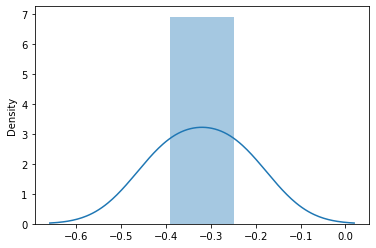

In [ ]:
sns.distplot(cluster[0])

C:\Users\janna\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

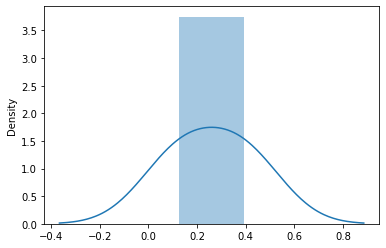

In [ ]:
sns.distplot(cluster[1])

### Elbow methods
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.

2. For each k, calculate the total within-cluster sum of square (wss).
Plot the curve of wss according to the number of clusters k.

3. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

Check :https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#elbow-method 

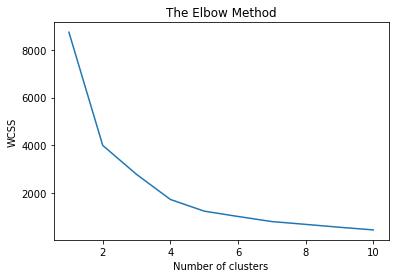

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**From the plot,Optimal Number of cluster K is 4.**

**4 types of customer clustered and plotted**
1. Lost Customer in Red
2. Average Customer in Green
3. Bought frequently but spend less Customer in Cyan
4. Loyal Customer in Blue


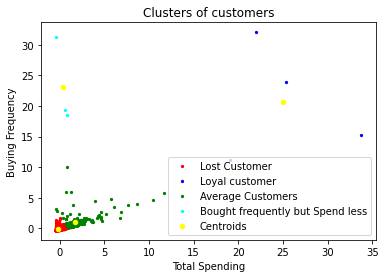

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(cluster)
plt.scatter(cluster[y_kmeans == 0, 0], cluster[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Lost Customer')
plt.scatter(cluster[y_kmeans == 1, 0], cluster[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Loyal customer')
plt.scatter(cluster[y_kmeans == 2, 0], cluster[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Average Customers')
plt.scatter(cluster[y_kmeans == 3, 0], cluster[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Bought frequently but Spend less')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total Spending')
plt.ylabel('Buying Frequency')
plt.legend()
plt.show()